In [1]:
#Librerias
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
#import plotly
import plotly.express as px
import seaborn as sns

# 1. Leer y tratar los datos. Debes dejarlos limpios en el formato que consideres más cómodo para su análisis.


Me quedo solo con los csv

In [2]:
def obtener_archivos_csv(ruta_carpeta):
    """
    Obtiene una lista de archivos CSV en una carpeta especificada.

    Args:
        ruta_carpeta (str): Ruta de la carpeta donde se buscan los archivos CSV.

    Returns:
        list: Lista de rutas de archivos CSV en la carpeta especificada.
    """
    ruta_busqueda = os.path.join(ruta_carpeta, '*.csv')
    archivos_csv = glob.glob(ruta_busqueda)
    return archivos_csv
def leer_y_combinar_csv():
    """
    Lee todos los archivos CSV en la carpeta actual y los combina en un solo DataFrame de Pandas.

    Args:
        None

    Returns:
        DataFrame: DataFrame de Pandas que contiene la información de todos los archivos CSV.
    """
    archivos_csv = obtener_archivos_csv(ruta_carpeta)
    dataframes = []
    
    for archivo in archivos_csv:
        df = pd.read_csv(archivo, sep =';')
        dataframes.append(df)
    
    dataframe_combinado = pd.concat(dataframes, ignore_index=True)
    return dataframe_combinado

ruta_carpeta = os.getcwd()+'/datos_calidad_aire'
archivos_csv = obtener_archivos_csv(ruta_carpeta)
df = leer_y_combinar_csv()
df

PROVINCIA  MUNICIPIO  ESTACION  MAGNITUD PUNTO_MUESTREO   ANO  MES  \
0             28         79         4         1  28079004_1_38  2018    4   
1             28         79         4         1  28079004_1_38  2018    4   
2             28         79         4         1  28079004_1_38  2018    4   
3             28         79         4         1  28079004_1_38  2018    4   
4             28         79         4         1  28079004_1_38  2018    4   
...          ...        ...       ...       ...            ...   ...  ...   
54826         28         79        60        14  28079060_14_6  2018    9   
54827         28         79        60        14  28079060_14_6  2018    9   
54828         28         79        60        14  28079060_14_6  2018    9   
54829         28         79        60        14  28079060_14_6  2018    9   
54830         28         79        60        14  28079060_14_6  2018    9   

       DIA    H01 V01  ...    H20 V20    H21 V21    H22 V22    H23 V23    H24  \
0        1   2.00   V  ...    2.0   V   2.00   V   3.00   V   4.00   V   3.00   
1        2   2.00   V  ...    2.0   V   2.00   V   2.00   V   2.00   V   2.00   
2        3   2.00   V  ...    2.0   V   2.00   V   2.00   V   2.00   V   2.00   
3        4   2.00   V  ...    2.0   V   2.00   V   2.00   V   2.00   V   2.00   
4        5   2.00   V  ...    2.0   V   2.00   V   4.00   V   5.00   V   4.00   
...    ...    ...  ..  ...    ...  ..    ...  ..    ...  ..    ...  ..    ...   
54826   26  57.88   V  ...   59.7   V  76.54   V  81.33   V  77.88   V  79.67   
54827   27  84.71   V  ...  103.3   V  70.81   V  34.07   V  12.90   V  36.85   
54828   28  27.33   V  ...  100.7   V  42.17   V   5.14   V   3.50   V   6.10   
54829   29  43.00   V  ...  126.7   V  76.40   V  27.62   V  17.95   V  10.89   
54830   30  42.76   V  ...  104.8   V  73.34   V  67.30   V  83.00   V  76.42   

      V24  
0       V  
1       V  
2       V  
3       V  
4       V  
...    ..  
54826   V  
54827   V  
54828   V  
54829   V  
54830   V  

[54831 rows x 56 columns]

Como en la documentación pone que el NO$_2$ es el código 8 vamos a filtrar el dataframe para obtener solo los datos de Magnitud

In [3]:
df = df[df['MAGNITUD'] == 8]
df

PROVINCIA  MUNICIPIO  ESTACION  MAGNITUD PUNTO_MUESTREO   ANO  MES  \
90            28         79         4         8   28079004_8_8  2018    4   
91            28         79         4         8   28079004_8_8  2018    4   
92            28         79         4         8   28079004_8_8  2018    4   
93            28         79         4         8   28079004_8_8  2018    4   
94            28         79         4         8   28079004_8_8  2018    4   
...          ...        ...       ...       ...            ...   ...  ...   
54736         28         79        60         8   28079060_8_8  2018    9   
54737         28         79        60         8   28079060_8_8  2018    9   
54738         28         79        60         8   28079060_8_8  2018    9   
54739         28         79        60         8   28079060_8_8  2018    9   
54740         28         79        60         8   28079060_8_8  2018    9   

       DIA   H01 V01  ...   H20 V20   H21 V21    H22 V22    H23 V23    H24 V24  
90       1  21.0   V  ...  46.0   V  57.0   V   82.0   V   85.0   V   77.0   V  
91       2  67.0   V  ...  22.0   V  26.0   V   38.0   V   15.0   V   15.0   V  
92       3  14.0   V  ...  23.0   V  27.0   V   30.0   V   23.0   V   20.0   V  
93       4   8.0   V  ...  14.0   V  19.0   V   22.0   V   28.0   V   23.0   V  
94       5  20.0   V  ...  45.0   V  68.0   V   99.0   V   93.0   V   84.0   V  
...    ...   ...  ..  ...   ...  ..   ...  ..    ...  ..    ...  ..    ...  ..  
54736   26  16.0   V  ...  47.0   V  26.0   V   17.0   V   15.0   V   13.0   V  
54737   27   9.0   V  ...  28.0   V  47.0   V   71.0   V  109.0   V   74.0   V  
54738   28  86.0   V  ...  26.0   V  73.0   V  120.0   V  129.0   V  116.0   V  
54739   29  62.0   V  ...  20.0   V  52.0   V   93.0   V   97.0   V  102.0   V  
54740   30  64.0   V  ...  22.0   V  28.0   V   31.0   V   19.0   V   20.0   V  

[8750 rows x 56 columns]

In [4]:
provincias_distinct = df['PROVINCIA'].unique()

# Obtener los valores distintos de la columna 'MUNICIPIO'
municipio_distinct = df['MUNICIPIO'].unique()

# Imprimir los valores distintos de 'PROVINCIA' y 'MUNICIPIO'
print("Valores distintos de PROVINCIA:", provincias_distinct)
print("Valores distintos de MUNICIPIO:", municipio_distinct)

Valores distintos de PROVINCIA: [28]
Valores distintos de MUNICIPIO: [79]


Dropeo las columnas de punto_muestreo, magnitud, municipio y provincia ya que se que el municipio es siempre Madrid y mediremos NO$_2$ (en la columna PUNTO_MUESTREO podemos obtener mediante un identificador la técnica que se ha utilizado para medir el NO$_2$ pero considero que no es relevante obtenerla)

In [5]:
df = df.drop(columns=['MAGNITUD', 'MUNICIPIO', 'PROVINCIA', 'PUNTO_MUESTREO'])
df

ESTACION   ANO  MES  DIA   H01 V01   H02 V02   H03 V03  ...   H20 V20  \
90            4  2018    4    1  21.0   V  19.0   V  17.0   V  ...  46.0   V   
91            4  2018    4    2  67.0   V  45.0   V  37.0   V  ...  22.0   V   
92            4  2018    4    3  14.0   V   9.0   V   8.0   V  ...  23.0   V   
93            4  2018    4    4   8.0   V   3.0   V   2.0   V  ...  14.0   V   
94            4  2018    4    5  20.0   V  23.0   V  19.0   V  ...  45.0   V   
...         ...   ...  ...  ...   ...  ..   ...  ..   ...  ..  ...   ...  ..   
54736        60  2018    9   26  16.0   V  13.0   V   7.0   V  ...  47.0   V   
54737        60  2018    9   27   9.0   V   9.0   V   8.0   V  ...  28.0   V   
54738        60  2018    9   28  86.0   V  33.0   V  35.0   V  ...  26.0   V   
54739        60  2018    9   29  62.0   V  26.0   V  20.0   V  ...  20.0   V   
54740        60  2018    9   30  64.0   V  29.0   V  16.0   V  ...  22.0   V   

        H21 V21    H22 V22    H23 V23    H24 V24  
90     57.0   V   82.0   V   85.0   V   77.0   V  
91     26.0   V   38.0   V   15.0   V   15.0   V  
92     27.0   V   30.0   V   23.0   V   20.0   V  
93     19.0   V   22.0   V   28.0   V   23.0   V  
94     68.0   V   99.0   V   93.0   V   84.0   V  
...     ...  ..    ...  ..    ...  ..    ...  ..  
54736  26.0   V   17.0   V   15.0   V   13.0   V  
54737  47.0   V   71.0   V  109.0   V   74.0   V  
54738  73.0   V  120.0   V  129.0   V  116.0   V  
54739  52.0   V   93.0   V   97.0   V  102.0   V  
54740  28.0   V   31.0   V   19.0   V   20.0   V  

[8750 rows x 52 columns]

Ya que tenemos 3 columnas para el año mes y dia, vamos a crear una que sea del tipo datetime combinando la información de las 3 columnas:

In [6]:
df = df.assign(
    FECHA_STR = df['ANO'].astype(str) + '-' + df['MES'].astype(str).str.zfill(2) + '-' + df['DIA'].astype(str).str.zfill(2)
)

# Convertir la columna de cadenas de texto a tipo datetime y asignar directamente
df.loc[:, 'FECHA'] = pd.to_datetime(df['FECHA_STR'])

# Eliminar la columna de cadenas de texto si ya no es necesaria
df = df.drop(columns=['FECHA_STR', 'ANO', 'MES', 'DIA'])

df

ESTACION   H01 V01   H02 V02   H03 V03   H04 V04   H05  ... V20   H21  \
90            4  21.0   V  19.0   V  17.0   V  24.0   V  17.0  ...   V  57.0   
91            4  67.0   V  45.0   V  37.0   V  21.0   V  19.0  ...   V  26.0   
92            4  14.0   V   9.0   V   8.0   V   4.0   V   4.0  ...   V  27.0   
93            4   8.0   V   3.0   V   2.0   V   3.0   V   2.0  ...   V  19.0   
94            4  20.0   V  23.0   V  19.0   V  17.0   V  18.0  ...   V  68.0   
...         ...   ...  ..   ...  ..   ...  ..   ...  ..   ...  ...  ..   ...   
54736        60  16.0   V  13.0   V   7.0   V   6.0   V   7.0  ...   V  26.0   
54737        60   9.0   V   9.0   V   8.0   V   6.0   V   6.0  ...   V  47.0   
54738        60  86.0   V  33.0   V  35.0   V  62.0   V  59.0  ...   V  73.0   
54739        60  62.0   V  26.0   V  20.0   V  18.0   V  14.0  ...   V  52.0   
54740        60  64.0   V  29.0   V  16.0   V  15.0   V  15.0  ...   V  28.0   

      V21    H22 V22    H23 V23    H24 V24      FECHA  
90      V   82.0   V   85.0   V   77.0   V 2018-04-01  
91      V   38.0   V   15.0   V   15.0   V 2018-04-02  
92      V   30.0   V   23.0   V   20.0   V 2018-04-03  
93      V   22.0   V   28.0   V   23.0   V 2018-04-04  
94      V   99.0   V   93.0   V   84.0   V 2018-04-05  
...    ..    ...  ..    ...  ..    ...  ..        ...  
54736   V   17.0   V   15.0   V   13.0   V 2018-09-26  
54737   V   71.0   V  109.0   V   74.0   V 2018-09-27  
54738   V  120.0   V  129.0   V  116.0   V 2018-09-28  
54739   V   93.0   V   97.0   V  102.0   V 2018-09-29  
54740   V   31.0   V   19.0   V   20.0   V 2018-09-30  

[8750 rows x 50 columns]

In [7]:
valores_distintos = pd.DataFrame()
for columna in df.columns:
    if columna.startswith('V'):
        valores_distintos[columna] = df[columna].unique()

valores_distintos

V01 V02 V03 V04 V05 V06 V07 V08 V09 V10  ... V15 V16 V17 V18 V19 V20 V21  \
0   V   V   V   V   V   V   V   V   V   V  ...   V   V   V   V   V   V   V   
1   N   N   N   N   N   N   N   N   N   N  ...   N   N   N   N   N   N   N   

  V22 V23 V24  
0   V   V   V  
1   N   N   N  

[2 rows x 24 columns]

In [8]:
# Crear las nuevas columnas auxiliares
for i in range(1, 25):
    # Obtener los nombres de las columnas 'V' y 'H'
    columna_v = f"V{i:02d}"
    columna_h = f"H{i:02d}"
    
    # Convertir los valores numéricos de 'H' a cadenas
    df[columna_h] = df[columna_h].astype(str)
    
    # Crear la nueva columna 'aux_X' combinando los valores de 'V' y 'H'
    df[f"aux_{i}"] = df[columna_h] + ' ' + df[columna_v]

# Imprimir el DataFrame con las nuevas columnas auxiliares
df

ESTACION   H01 V01   H02 V02   H03 V03   H04 V04   H05  ...  aux_15  \
90            4  21.0   V  19.0   V  17.0   V  24.0   V  17.0  ...  29.0 V   
91            4  67.0   V  45.0   V  37.0   V  21.0   V  19.0  ...  30.0 V   
92            4  14.0   V   9.0   V   8.0   V   4.0   V   4.0  ...  22.0 V   
93            4   8.0   V   3.0   V   2.0   V   3.0   V   2.0  ...  19.0 V   
94            4  20.0   V  23.0   V  19.0   V  17.0   V  18.0  ...  39.0 V   
...         ...   ...  ..   ...  ..   ...  ..   ...  ..   ...  ...     ...   
54736        60  16.0   V  13.0   V   7.0   V   6.0   V   7.0  ...  17.0 V   
54737        60   9.0   V   9.0   V   8.0   V   6.0   V   6.0  ...  41.0 V   
54738        60  86.0   V  33.0   V  35.0   V  62.0   V  59.0  ...  16.0 V   
54739        60  62.0   V  26.0   V  20.0   V  18.0   V  14.0  ...  18.0 V   
54740        60  64.0   V  29.0   V  16.0   V  15.0   V  15.0  ...  38.0 V   

       aux_16  aux_17  aux_18  aux_19  aux_20  aux_21   aux_22   aux_23  \
90     22.0 V  17.0 V  24.0 V  32.0 V  46.0 V  57.0 V   82.0 V   85.0 V   
91     21.0 V  19.0 V  21.0 V  20.0 V  22.0 V  26.0 V   38.0 V   15.0 V   
92     17.0 V  17.0 V  22.0 V  24.0 V  23.0 V  27.0 V   30.0 V   23.0 V   
93     14.0 V  15.0 V  16.0 V  15.0 V  14.0 V  19.0 V   22.0 V   28.0 V   
94     33.0 V  28.0 V  34.0 V  33.0 V  45.0 V  68.0 V   99.0 V   93.0 V   
...       ...     ...     ...     ...     ...     ...      ...      ...   
54736  22.0 V  20.0 V  19.0 V  23.0 V  47.0 V  26.0 V   17.0 V   15.0 V   
54737  35.0 V  42.0 V  33.0 V  26.0 V  28.0 V  47.0 V   71.0 V  109.0 V   
54738  11.0 V  12.0 V  15.0 V  17.0 V  26.0 V  73.0 V  120.0 V  129.0 V   
54739  21.0 V  24.0 V  17.0 V  13.0 V  20.0 V  52.0 V   93.0 V   97.0 V   
54740  20.0 V  12.0 V  11.0 V  14.0 V  22.0 V  28.0 V   31.0 V   19.0 V   

        aux_24  
90      77.0 V  
91      15.0 V  
92      20.0 V  
93      23.0 V  
94      84.0 V  
...        ...  
54736   13.0 V  
54737   74.0 V  
54738  116.0 V  
54739  102.0 V  
54740   20.0 V  

[8750 rows x 74 columns]

In [9]:
# Suponiendo que tienes un DataFrame llamado df con las columnas H01, V01, H02, V02, etc., y la columna FECHA
# Crear una lista de las columnas que no son H o V
columnas_aux = [col for col in df.columns if (col.startswith('aux'))]

# Derretir el DataFrame para convertir las columnas de hora y validez en filas
df_melted = pd.melt(df, id_vars=['ESTACION', 'FECHA'], value_vars=columnas_aux, var_name='HORA_MAS_VALOR', value_name='VALOR')
df_melted 

ESTACION      FECHA HORA_MAS_VALOR    VALOR
0              4 2018-04-01          aux_1   21.0 V
1              4 2018-04-02          aux_1   67.0 V
2              4 2018-04-03          aux_1   14.0 V
3              4 2018-04-04          aux_1    8.0 V
4              4 2018-04-05          aux_1   20.0 V
...          ...        ...            ...      ...
209995        60 2018-09-26         aux_24   13.0 V
209996        60 2018-09-27         aux_24   74.0 V
209997        60 2018-09-28         aux_24  116.0 V
209998        60 2018-09-29         aux_24  102.0 V
209999        60 2018-09-30         aux_24   20.0 V

[210000 rows x 4 columns]

In [10]:
# Dividir la columna 'VALOR' en dos columnas separadas
df_melted[['VALOR_NO2', 'VALIDEZ']] = df_melted['VALOR'].str.split(' ', expand=True)

# Imprimir el DataFrame con las nuevas columnas separadas
df_melted

ESTACION      FECHA HORA_MAS_VALOR    VALOR VALOR_NO2 VALIDEZ
0              4 2018-04-01          aux_1   21.0 V      21.0       V
1              4 2018-04-02          aux_1   67.0 V      67.0       V
2              4 2018-04-03          aux_1   14.0 V      14.0       V
3              4 2018-04-04          aux_1    8.0 V       8.0       V
4              4 2018-04-05          aux_1   20.0 V      20.0       V
...          ...        ...            ...      ...       ...     ...
209995        60 2018-09-26         aux_24   13.0 V      13.0       V
209996        60 2018-09-27         aux_24   74.0 V      74.0       V
209997        60 2018-09-28         aux_24  116.0 V     116.0       V
209998        60 2018-09-29         aux_24  102.0 V     102.0       V
209999        60 2018-09-30         aux_24   20.0 V      20.0       V

[210000 rows x 6 columns]

In [11]:
# Convertir la columna 'hora_mas_valor' a un número de horas en df_melted
df_melted['HORA_MAS_VALOR'] = df_melted['HORA_MAS_VALOR'].str.replace('aux_', '').astype(int)

# Añadir el número de horas a la columna 'FECHA' en df_melted
df_melted['FECHA'] = pd.to_datetime(df_melted['FECHA']) + pd.to_timedelta(df_melted['HORA_MAS_VALOR'], unit='h')
df_melted

ESTACION               FECHA  HORA_MAS_VALOR    VALOR VALOR_NO2  \
0              4 2018-04-01 01:00:00               1   21.0 V      21.0   
1              4 2018-04-02 01:00:00               1   67.0 V      67.0   
2              4 2018-04-03 01:00:00               1   14.0 V      14.0   
3              4 2018-04-04 01:00:00               1    8.0 V       8.0   
4              4 2018-04-05 01:00:00               1   20.0 V      20.0   
...          ...                 ...             ...      ...       ...   
209995        60 2018-09-27 00:00:00              24   13.0 V      13.0   
209996        60 2018-09-28 00:00:00              24   74.0 V      74.0   
209997        60 2018-09-29 00:00:00              24  116.0 V     116.0   
209998        60 2018-09-30 00:00:00              24  102.0 V     102.0   
209999        60 2018-10-01 00:00:00              24   20.0 V      20.0   

       VALIDEZ  
0            V  
1            V  
2            V  
3            V  
4            V  
...        ...  
209995       V  
209996       V  
209997       V  
209998       V  
209999       V  

[210000 rows x 6 columns]

In [12]:
df_melted.drop(columns=['HORA_MAS_VALOR'], inplace=True)
df_melted.drop(columns=['VALOR'], inplace=True)
df_melted

ESTACION               FECHA VALOR_NO2 VALIDEZ
0              4 2018-04-01 01:00:00      21.0       V
1              4 2018-04-02 01:00:00      67.0       V
2              4 2018-04-03 01:00:00      14.0       V
3              4 2018-04-04 01:00:00       8.0       V
4              4 2018-04-05 01:00:00      20.0       V
...          ...                 ...       ...     ...
209995        60 2018-09-27 00:00:00      13.0       V
209996        60 2018-09-28 00:00:00      74.0       V
209997        60 2018-09-29 00:00:00     116.0       V
209998        60 2018-09-30 00:00:00     102.0       V
209999        60 2018-10-01 00:00:00      20.0       V

[210000 rows x 4 columns]

In [13]:
df_sorted = df_melted.sort_values(by=['ESTACION', 'FECHA']).reset_index(drop=True)
df_sorted.head(45)

ESTACION               FECHA VALOR_NO2 VALIDEZ
0          4 2018-01-01 01:00:00      15.0       V
1          4 2018-01-01 02:00:00      35.0       V
2          4 2018-01-01 03:00:00      29.0       V
3          4 2018-01-01 04:00:00      16.0       V
4          4 2018-01-01 05:00:00      12.0       V
5          4 2018-01-01 06:00:00      10.0       V
6          4 2018-01-01 07:00:00       9.0       V
7          4 2018-01-01 08:00:00      16.0       V
8          4 2018-01-01 09:00:00      27.0       V
9          4 2018-01-01 10:00:00      35.0       V
10         4 2018-01-01 11:00:00      21.0       V
11         4 2018-01-01 12:00:00      18.0       V
12         4 2018-01-01 13:00:00      21.0       V
13         4 2018-01-01 14:00:00      18.0       V
14         4 2018-01-01 15:00:00      15.0       V
15         4 2018-01-01 16:00:00      10.0       V
16         4 2018-01-01 17:00:00      14.0       V
17         4 2018-01-01 18:00:00      25.0       V
18         4 2018-01-01 19:00:00      32.0       V
19         4 2018-01-01 20:00:00      39.0       V
20         4 2018-01-01 21:00:00      35.0       V
21         4 2018-01-01 22:00:00      27.0       V
22         4 2018-01-01 23:00:00      23.0       V
23         4 2018-01-02 00:00:00      11.0       V
24         4 2018-01-02 01:00:00      13.0       V
25         4 2018-01-02 02:00:00      17.0       V
26         4 2018-01-02 03:00:00       6.0       V
27         4 2018-01-02 04:00:00       3.0       V
28         4 2018-01-02 05:00:00       1.0       V
29         4 2018-01-02 06:00:00       2.0       V
30         4 2018-01-02 07:00:00      10.0       V
31         4 2018-01-02 08:00:00      23.0       V
32         4 2018-01-02 09:00:00      48.0       V
33         4 2018-01-02 10:00:00      35.0       V
34         4 2018-01-02 11:00:00      35.0       V
35         4 2018-01-02 12:00:00      34.0       V
36         4 2018-01-02 13:00:00      33.0       V
37         4 2018-01-02 14:00:00      33.0       V
38         4 2018-01-02 15:00:00      39.0       V
39         4 2018-01-02 16:00:00      36.0       V
40         4 2018-01-02 17:00:00      36.0       V
41         4 2018-01-02 18:00:00      34.0       V
42         4 2018-01-02 19:00:00      34.0       V
43         4 2018-01-02 20:00:00      38.0       V
44         4 2018-01-02 21:00:00      41.0       V

In [14]:
df_sorted

ESTACION               FECHA VALOR_NO2 VALIDEZ
0              4 2018-01-01 01:00:00      15.0       V
1              4 2018-01-01 02:00:00      35.0       V
2              4 2018-01-01 03:00:00      29.0       V
3              4 2018-01-01 04:00:00      16.0       V
4              4 2018-01-01 05:00:00      12.0       V
...          ...                 ...       ...     ...
209995        60 2018-12-31 20:00:00      94.0       V
209996        60 2018-12-31 21:00:00      98.0       V
209997        60 2018-12-31 22:00:00      99.0       V
209998        60 2018-12-31 23:00:00     109.0       V
209999        60 2019-01-01 00:00:00      78.0       V

[210000 rows x 4 columns]

In [15]:
df_sorted.dtypes

ESTACION              int64
FECHA        datetime64[ns]
VALOR_NO2            object
VALIDEZ              object
dtype: object

Añadimos la info de temperatura y estaciones:

In [16]:
ruta_carpeta = os.getcwd()
df_estaciones = pd.read_csv(ruta_carpeta+'/estaciones_y_temperatura/madrid_air_quality_stations.csv', sep =',')
df_estaciones

station      area                    name  \
0   28079004    centro          Pza. de España   
1   28079008    centro        Escuelas Aguirre   
2   28079011    centro     Avda. Ramón y Cajal   
3   28079016   noreste            Arturo Soria   
4   28079017  suroeste              Villaverde   
5   28079018  suroeste               Farolillo   
6   28079024  noroeste           Casa de Campo   
7   28079027   noreste          Barajas Pueblo   
8   28079035    centro         Pza. del Carmen   
9   28079036   sureste               Moratalaz   
10  28079038    centro          Cuatro Caminos   
11  28079039    centro        Barrio del Pilar   
12  28079040   sureste                Vallecas   
13  28079047    centro           Mendez Alvaro   
14  28079048    centro              Castellana   
15  28079049    centro       Parque del Retiro   
16  28079050    centro          Plaza Castilla   
17  28079054   sureste    Ensanche de Vallecas   
18  28079055   noreste           Urb. Embajada   
19  28079056  suroeste  Pza. Fernández Ladreda   
20  28079057   noreste             Sanchinarro   
21  28079058  noroeste                El Pardo   
22  28079059   noreste           Juan Carlos I   
23  28079060   noreste             Tres Olivos   

                                              address  altitude type  \
0                                     Plaza de España       635   UT   
1                      Entre C/ Alcalá y C/ O' Donell       670   UT   
2     Avda. Ramón y Cajal esq. C/ Príncipe de Vergara       708   UT   
3      C/ Arturo Soria esq. C/ Vizconde de los Asilos       693   UF   
4                                   C/. Juan Peñalver       604   UF   
5                         Calle Farolillo - C/Ervigio       630   UF   
6             Casa de Campo (Terminal del Teleférico)       642    S   
7                            C/. Júpiter 21 (Barajas)       621   UF   
8                  Plaza del Carmen esq. Tres Cruces.       659   UF   
9         Avd. Moratalaz esq. Camino de los Vinateros       685   UT   
10       Avda. Pablo Iglesias esq. C/ Marqués de Lema       698   UT   
11            Avd. Betanzos esq. C/ Monforte de Lemos       674   UT   
12           C/ Arroyo del Olivar esq. C/ Río Grande.       677   UF   
13   C/ Juan de Mariana / Pza. Amanecer Mendez Alvaro       599   UF   
14                          C/ Jose Gutierrez Abascal       676   UT   
15                     Paseo Venezuela- Casa de Vacas       662   UF   
16                             Plaza Castilla (Canal)       728   UT   
17                  Avda La Gavia / Avda. Las Suertes       627   UF   
18                                 C/ Riaño (Barajas)       618   UF   
19              Pza. Fernández Ladreda - Avda. Oporto       604   UT   
20            C/ Princesa de Eboli esq C/ Maria Tudor       700   UF   
21                                   Avda. La Guardia       615    S   
22  Parque Juan Carlos I (frente oficinas mantenim...       660    S   
23                                  Plaza Tres Olivos       715   UF   

    longitude   latitude  
0   -3.712247  40.423853  
1   -3.682319  40.421564  
2   -3.677356  40.451475  
3   -3.639233  40.440047  
4   -3.713322  40.347139  
5   -3.731853  40.394781  
6   -3.747347  40.419356  
7   -3.580031  40.476928  
8   -3.703172  40.419208  
9   -3.645306  40.407947  
10  -3.707128  40.445544  
11  -3.711542  40.478228  
12  -3.651522  40.388153  
13  -3.686825  40.398114  
14  -3.690367  40.439897  
15  -3.682583  40.414444  
16  -3.688769  40.465572  
17  -3.612117  40.372933  
18  -3.580747  40.462531  
19  -3.718728  40.384964  
20  -3.660503  40.494208  
21  -3.774611  40.518058  
22  -3.609072  40.465250  
23  -3.689761  40.500589

In [17]:
def extraer_ultimos_digitos_y_convertir(df, col_name):
    """
    Descripción de la función:
    Esta función toma un DataFrame de pandas, extrae los dos últimos dígitos de una columna especificada,
    los convierte a entero y los guarda en una nueva columna llamada 'ESTACION'.

    Args:
        df (pd.DataFrame): DataFrame de pandas que se va a procesar.
        col_name (str): Nombre de la columna de la cual se extraerán los últimos dos dígitos.

    Returns:
        pd.DataFrame: DataFrame de pandas con la nueva columna añadida.
    """
    nueva_columna = "ESTACION"
    df[nueva_columna] = df[col_name].astype(str).apply(lambda x: int(x[-2:]))
    return df

df_estaciones = extraer_ultimos_digitos_y_convertir(df_estaciones, 'station')
df_estaciones

station      area                    name  \
0   28079004    centro          Pza. de España   
1   28079008    centro        Escuelas Aguirre   
2   28079011    centro     Avda. Ramón y Cajal   
3   28079016   noreste            Arturo Soria   
4   28079017  suroeste              Villaverde   
5   28079018  suroeste               Farolillo   
6   28079024  noroeste           Casa de Campo   
7   28079027   noreste          Barajas Pueblo   
8   28079035    centro         Pza. del Carmen   
9   28079036   sureste               Moratalaz   
10  28079038    centro          Cuatro Caminos   
11  28079039    centro        Barrio del Pilar   
12  28079040   sureste                Vallecas   
13  28079047    centro           Mendez Alvaro   
14  28079048    centro              Castellana   
15  28079049    centro       Parque del Retiro   
16  28079050    centro          Plaza Castilla   
17  28079054   sureste    Ensanche de Vallecas   
18  28079055   noreste           Urb. Embajada   
19  28079056  suroeste  Pza. Fernández Ladreda   
20  28079057   noreste             Sanchinarro   
21  28079058  noroeste                El Pardo   
22  28079059   noreste           Juan Carlos I   
23  28079060   noreste             Tres Olivos   

                                              address  altitude type  \
0                                     Plaza de España       635   UT   
1                      Entre C/ Alcalá y C/ O' Donell       670   UT   
2     Avda. Ramón y Cajal esq. C/ Príncipe de Vergara       708   UT   
3      C/ Arturo Soria esq. C/ Vizconde de los Asilos       693   UF   
4                                   C/. Juan Peñalver       604   UF   
5                         Calle Farolillo - C/Ervigio       630   UF   
6             Casa de Campo (Terminal del Teleférico)       642    S   
7                            C/. Júpiter 21 (Barajas)       621   UF   
8                  Plaza del Carmen esq. Tres Cruces.       659   UF   
9         Avd. Moratalaz esq. Camino de los Vinateros       685   UT   
10       Avda. Pablo Iglesias esq. C/ Marqués de Lema       698   UT   
11            Avd. Betanzos esq. C/ Monforte de Lemos       674   UT   
12           C/ Arroyo del Olivar esq. C/ Río Grande.       677   UF   
13   C/ Juan de Mariana / Pza. Amanecer Mendez Alvaro       599   UF   
14                          C/ Jose Gutierrez Abascal       676   UT   
15                     Paseo Venezuela- Casa de Vacas       662   UF   
16                             Plaza Castilla (Canal)       728   UT   
17                  Avda La Gavia / Avda. Las Suertes       627   UF   
18                                 C/ Riaño (Barajas)       618   UF   
19              Pza. Fernández Ladreda - Avda. Oporto       604   UT   
20            C/ Princesa de Eboli esq C/ Maria Tudor       700   UF   
21                                   Avda. La Guardia       615    S   
22  Parque Juan Carlos I (frente oficinas mantenim...       660    S   
23                                  Plaza Tres Olivos       715   UF   

    longitude   latitude  ESTACION  
0   -3.712247  40.423853         4  
1   -3.682319  40.421564         8  
2   -3.677356  40.451475        11  
3   -3.639233  40.440047        16  
4   -3.713322  40.347139        17  
5   -3.731853  40.394781        18  
6   -3.747347  40.419356        24  
7   -3.580031  40.476928        27  
8   -3.703172  40.419208        35  
9   -3.645306  40.407947        36  
10  -3.707128  40.445544        38  
11  -3.711542  40.478228        39  
12  -3.651522  40.388153        40  
13  -3.686825  40.398114        47  
14  -3.690367  40.439897        48  
15  -3.682583  40.414444        49  
16  -3.688769  40.465572        50  
17  -3.612117  40.372933        54  
18  -3.580747  40.462531        55  
19  -3.718728  40.384964        56  
20  -3.660503  40.494208        57  
21  -3.774611  40.518058        58  
22  -3.609072  40.465250        59  
23  -3.689761  40.500589        60

In [18]:
df_resultado = df_sorted.merge(df_estaciones[['ESTACION', 'area', 'longitude', 'latitude', 'name']], on='ESTACION', how='left')
df_resultado

ESTACION               FECHA VALOR_NO2 VALIDEZ     area  longitude  \
0              4 2018-01-01 01:00:00      15.0       V   centro  -3.712247   
1              4 2018-01-01 02:00:00      35.0       V   centro  -3.712247   
2              4 2018-01-01 03:00:00      29.0       V   centro  -3.712247   
3              4 2018-01-01 04:00:00      16.0       V   centro  -3.712247   
4              4 2018-01-01 05:00:00      12.0       V   centro  -3.712247   
...          ...                 ...       ...     ...      ...        ...   
209995        60 2018-12-31 20:00:00      94.0       V  noreste  -3.689761   
209996        60 2018-12-31 21:00:00      98.0       V  noreste  -3.689761   
209997        60 2018-12-31 22:00:00      99.0       V  noreste  -3.689761   
209998        60 2018-12-31 23:00:00     109.0       V  noreste  -3.689761   
209999        60 2019-01-01 00:00:00      78.0       V  noreste  -3.689761   

         latitude            name  
0       40.423853  Pza. de España  
1       40.423853  Pza. de España  
2       40.423853  Pza. de España  
3       40.423853  Pza. de España  
4       40.423853  Pza. de España  
...           ...             ...  
209995  40.500589     Tres Olivos  
209996  40.500589     Tres Olivos  
209997  40.500589     Tres Olivos  
209998  40.500589     Tres Olivos  
209999  40.500589     Tres Olivos  

[210000 rows x 8 columns]

In [19]:
df_temperaturas = pd.read_csv(ruta_carpeta+'/estaciones_y_temperatura/madrid_hourly_temperatures_2018.csv', sep =',')
df_temperaturas

date  hour  temp
0     2018-01-01     0   7.3
1     2018-01-01     1   7.4
2     2018-01-01     2   6.8
3     2018-01-01     3   7.1
4     2018-01-01     4   5.3
...          ...   ...   ...
8755  2018-12-31    19   5.5
8756  2018-12-31    20   3.6
8757  2018-12-31    21   2.9
8758  2018-12-31    22   1.5
8759  2018-12-31    23   0.6

[8760 rows x 3 columns]

In [20]:
df_temperaturas['hora_mas_uno'] = df_temperaturas['hour'] + 1
df_temperaturas

date  hour  temp  hora_mas_uno
0     2018-01-01     0   7.3             1
1     2018-01-01     1   7.4             2
2     2018-01-01     2   6.8             3
3     2018-01-01     3   7.1             4
4     2018-01-01     4   5.3             5
...          ...   ...   ...           ...
8755  2018-12-31    19   5.5            20
8756  2018-12-31    20   3.6            21
8757  2018-12-31    21   2.9            22
8758  2018-12-31    22   1.5            23
8759  2018-12-31    23   0.6            24

[8760 rows x 4 columns]

In [21]:
df_temperaturas['FECHA'] = pd.to_datetime(df_temperaturas['date']) + pd.to_timedelta(df_temperaturas['hora_mas_uno'], unit='h')
df_temperaturas

date  hour  temp  hora_mas_uno               FECHA
0     2018-01-01     0   7.3             1 2018-01-01 01:00:00
1     2018-01-01     1   7.4             2 2018-01-01 02:00:00
2     2018-01-01     2   6.8             3 2018-01-01 03:00:00
3     2018-01-01     3   7.1             4 2018-01-01 04:00:00
4     2018-01-01     4   5.3             5 2018-01-01 05:00:00
...          ...   ...   ...           ...                 ...
8755  2018-12-31    19   5.5            20 2018-12-31 20:00:00
8756  2018-12-31    20   3.6            21 2018-12-31 21:00:00
8757  2018-12-31    21   2.9            22 2018-12-31 22:00:00
8758  2018-12-31    22   1.5            23 2018-12-31 23:00:00
8759  2018-12-31    23   0.6            24 2019-01-01 00:00:00

[8760 rows x 5 columns]

In [22]:
df_final = df_resultado.merge(df_temperaturas[['FECHA', 'temp']], on='FECHA', how='left')

df_final 

ESTACION               FECHA VALOR_NO2 VALIDEZ     area  longitude  \
0              4 2018-01-01 01:00:00      15.0       V   centro  -3.712247   
1              4 2018-01-01 02:00:00      35.0       V   centro  -3.712247   
2              4 2018-01-01 03:00:00      29.0       V   centro  -3.712247   
3              4 2018-01-01 04:00:00      16.0       V   centro  -3.712247   
4              4 2018-01-01 05:00:00      12.0       V   centro  -3.712247   
...          ...                 ...       ...     ...      ...        ...   
209995        60 2018-12-31 20:00:00      94.0       V  noreste  -3.689761   
209996        60 2018-12-31 21:00:00      98.0       V  noreste  -3.689761   
209997        60 2018-12-31 22:00:00      99.0       V  noreste  -3.689761   
209998        60 2018-12-31 23:00:00     109.0       V  noreste  -3.689761   
209999        60 2019-01-01 00:00:00      78.0       V  noreste  -3.689761   

         latitude            name  temp  
0       40.423853  Pza. de España   7.3  
1       40.423853  Pza. de España   7.4  
2       40.423853  Pza. de España   6.8  
3       40.423853  Pza. de España   7.1  
4       40.423853  Pza. de España   5.3  
...           ...             ...   ...  
209995  40.500589     Tres Olivos   5.5  
209996  40.500589     Tres Olivos   3.6  
209997  40.500589     Tres Olivos   2.9  
209998  40.500589     Tres Olivos   1.5  
209999  40.500589     Tres Olivos   0.6  

[210000 rows x 9 columns]

In [23]:
df_final = df_final.drop(columns=['ESTACION'])
# Renombrar las columnas
df_final = df_final.rename(columns={
    'area': 'AREA',
    'longitude': 'LONGITUD',
    'latitude': 'LATITUD',
    'temp': 'TEMPERATURA',
    'name': 'ESTACION'
})

df_final

FECHA VALOR_NO2 VALIDEZ     AREA  LONGITUD    LATITUD  \
0      2018-01-01 01:00:00      15.0       V   centro -3.712247  40.423853   
1      2018-01-01 02:00:00      35.0       V   centro -3.712247  40.423853   
2      2018-01-01 03:00:00      29.0       V   centro -3.712247  40.423853   
3      2018-01-01 04:00:00      16.0       V   centro -3.712247  40.423853   
4      2018-01-01 05:00:00      12.0       V   centro -3.712247  40.423853   
...                    ...       ...     ...      ...       ...        ...   
209995 2018-12-31 20:00:00      94.0       V  noreste -3.689761  40.500589   
209996 2018-12-31 21:00:00      98.0       V  noreste -3.689761  40.500589   
209997 2018-12-31 22:00:00      99.0       V  noreste -3.689761  40.500589   
209998 2018-12-31 23:00:00     109.0       V  noreste -3.689761  40.500589   
209999 2019-01-01 00:00:00      78.0       V  noreste -3.689761  40.500589   

              ESTACION  TEMPERATURA  
0       Pza. de España          7.3  
1       Pza. de España          7.4  
2       Pza. de España          6.8  
3       Pza. de España          7.1  
4       Pza. de España          5.3  
...                ...          ...  
209995     Tres Olivos          5.5  
209996     Tres Olivos          3.6  
209997     Tres Olivos          2.9  
209998     Tres Olivos          1.5  
209999     Tres Olivos          0.6  

[210000 rows x 8 columns]

In [24]:
df_final.dtypes

FECHA          datetime64[ns]
VALOR_NO2              object
VALIDEZ                object
AREA                   object
LONGITUD              float64
LATITUD               float64
ESTACION               object
TEMPERATURA           float64
dtype: object

In [25]:
df_final['VALOR_NO2'] = df_final['VALOR_NO2'].astype(float)

In [26]:
df_final.dtypes

FECHA          datetime64[ns]
VALOR_NO2             float64
VALIDEZ                object
AREA                   object
LONGITUD              float64
LATITUD               float64
ESTACION               object
TEMPERATURA           float64
dtype: object

# 2. Hacer una exploración de los datos. Es libre, intenta sacar algunas conclusiones de factores que puedan afectar en los niveles de NO2: estacionales, ambientales, etc.

In [27]:
df_final

FECHA  VALOR_NO2 VALIDEZ     AREA  LONGITUD    LATITUD  \
0      2018-01-01 01:00:00       15.0       V   centro -3.712247  40.423853   
1      2018-01-01 02:00:00       35.0       V   centro -3.712247  40.423853   
2      2018-01-01 03:00:00       29.0       V   centro -3.712247  40.423853   
3      2018-01-01 04:00:00       16.0       V   centro -3.712247  40.423853   
4      2018-01-01 05:00:00       12.0       V   centro -3.712247  40.423853   
...                    ...        ...     ...      ...       ...        ...   
209995 2018-12-31 20:00:00       94.0       V  noreste -3.689761  40.500589   
209996 2018-12-31 21:00:00       98.0       V  noreste -3.689761  40.500589   
209997 2018-12-31 22:00:00       99.0       V  noreste -3.689761  40.500589   
209998 2018-12-31 23:00:00      109.0       V  noreste -3.689761  40.500589   
209999 2019-01-01 00:00:00       78.0       V  noreste -3.689761  40.500589   

              ESTACION  TEMPERATURA  
0       Pza. de España          7.3  
1       Pza. de España          7.4  
2       Pza. de España          6.8  
3       Pza. de España          7.1  
4       Pza. de España          5.3  
...                ...          ...  
209995     Tres Olivos          5.5  
209996     Tres Olivos          3.6  
209997     Tres Olivos          2.9  
209998     Tres Olivos          1.5  
209999     Tres Olivos          0.6  

[210000 rows x 8 columns]

In [28]:
# Función para comprobar fechas faltantes
def comprobar_fechas(estacion_df):
    fecha_inicio = estacion_df['FECHA'].min()
    fecha_fin = estacion_df['FECHA'].max()
    todas_fechas = pd.date_range(start=fecha_inicio, end=fecha_fin, freq='H')
    fechas_reales = estacion_df['FECHA'].sort_values()
    fechas_faltantes = todas_fechas.difference(fechas_reales)
    return pd.DataFrame({'ESTACION': estacion_df['ESTACION'].iloc[0], 'FECHA_FALTANTE': fechas_faltantes})

# Aplicar la función a cada grupo de estación
faltantes_por_estacion = df_final.groupby('ESTACION').apply(comprobar_fechas).reset_index(drop=True)

# Mostrar el DataFrame de fechas faltantes
faltantes_por_estacion

ESTACION      FECHA_FALTANTE
0          Farolillo 2018-04-18 01:00:00
1          Farolillo 2018-04-18 02:00:00
2          Farolillo 2018-04-18 03:00:00
3          Farolillo 2018-04-18 04:00:00
4          Farolillo 2018-04-18 05:00:00
..               ...                 ...
235  Pza. del Carmen 2018-11-11 20:00:00
236  Pza. del Carmen 2018-11-11 21:00:00
237  Pza. del Carmen 2018-11-11 22:00:00
238  Pza. del Carmen 2018-11-11 23:00:00
239  Pza. del Carmen 2018-11-12 00:00:00

[240 rows x 2 columns]

La cantidad de fechas para las que no se han recogido datos es muy pequeña, solo faltan 240 observaciones en el dataframe.
Tenemos un 240/(210000+240)*100 = 0.11% de fechas faltantes

Vamos a ver como están concentradas:

In [29]:
# Filtrar estaciones con fechas faltantes
estaciones_con_faltantes = faltantes_por_estacion['ESTACION'].unique()
print(estaciones_con_faltantes)

['Farolillo' 'Pza. del Carmen']


In [30]:
# Extraer solo la parte de la fecha
faltantes_por_estacion['FECHA'] = faltantes_por_estacion['FECHA_FALTANTE'].dt.date

# Obtener los diferentes valores de fecha para cada estación
fechas_por_estacion = faltantes_por_estacion.groupby('ESTACION')['FECHA'].unique()

# Mostrar los dates diferentes por estación
for estacion, fechas in fechas_por_estacion.items():
    print(f"Fechas diferentes para {estacion}:")
    print(fechas)

Fechas diferentes para Farolillo:
[datetime.date(2018, 4, 18) datetime.date(2018, 4, 19)
 datetime.date(2018, 6, 23) datetime.date(2018, 6, 24)
 datetime.date(2018, 6, 25) datetime.date(2018, 6, 26)]
Fechas diferentes para Pza. del Carmen:
[datetime.date(2018, 8, 3) datetime.date(2018, 8, 4)
 datetime.date(2018, 8, 5) datetime.date(2018, 8, 6)
 datetime.date(2018, 11, 9) datetime.date(2018, 11, 10)
 datetime.date(2018, 11, 11) datetime.date(2018, 11, 12)]


Vemos como las fechas faltantes pueden ser debido a una avería o modificación del sistema puntual ya que siempre se concentran en días seguidos

Ahora vamos a ver cuantos de los datos son fallidos en su medición:

In [31]:
df_final[df_final['VALIDEZ']=='N']

FECHA  VALOR_NO2 VALIDEZ     AREA  LONGITUD    LATITUD  \
371    2018-01-16 12:00:00       82.0       N   centro -3.712247  40.423853   
685    2018-01-29 14:00:00       72.0       N   centro -3.712247  40.423853   
1994   2018-03-25 03:00:00        0.0       N   centro -3.712247  40.423853   
2363   2018-04-09 12:00:00       57.0       N   centro -3.712247  40.423853   
3034   2018-05-07 11:00:00       68.0       N   centro -3.712247  40.423853   
...                    ...        ...     ...      ...       ...        ...   
207970 2018-10-08 11:00:00       10.0       N  noreste -3.689761  40.500589   
207971 2018-10-08 12:00:00      130.0       N  noreste -3.689761  40.500589   
207972 2018-10-08 13:00:00       79.0       N  noreste -3.689761  40.500589   
207973 2018-10-08 14:00:00       95.0       N  noreste -3.689761  40.500589   
208718 2018-11-08 15:00:00       33.0       N  noreste -3.689761  40.500589   

              ESTACION  TEMPERATURA  
371     Pza. de España          6.7  
685     Pza. de España         12.7  
1994    Pza. de España          7.0  
2363    Pza. de España          7.3  
3034    Pza. de España         15.9  
...                ...          ...  
207970     Tres Olivos         16.4  
207971     Tres Olivos         18.3  
207972     Tres Olivos         18.3  
207973     Tres Olivos         19.9  
208718     Tres Olivos         12.8  

[919 rows x 8 columns]

Vemos que hay 919 datos que han sido medidos de forma errónea. 

Esto no representa un gran problema pues de 210000 mediciones totales, solo son erróneas 919, un 919/210000*100 = 0.44% de datos erróneos. 

Los eliminamos:

In [32]:
df_final = df_final[df_final['VALIDEZ']=='V']

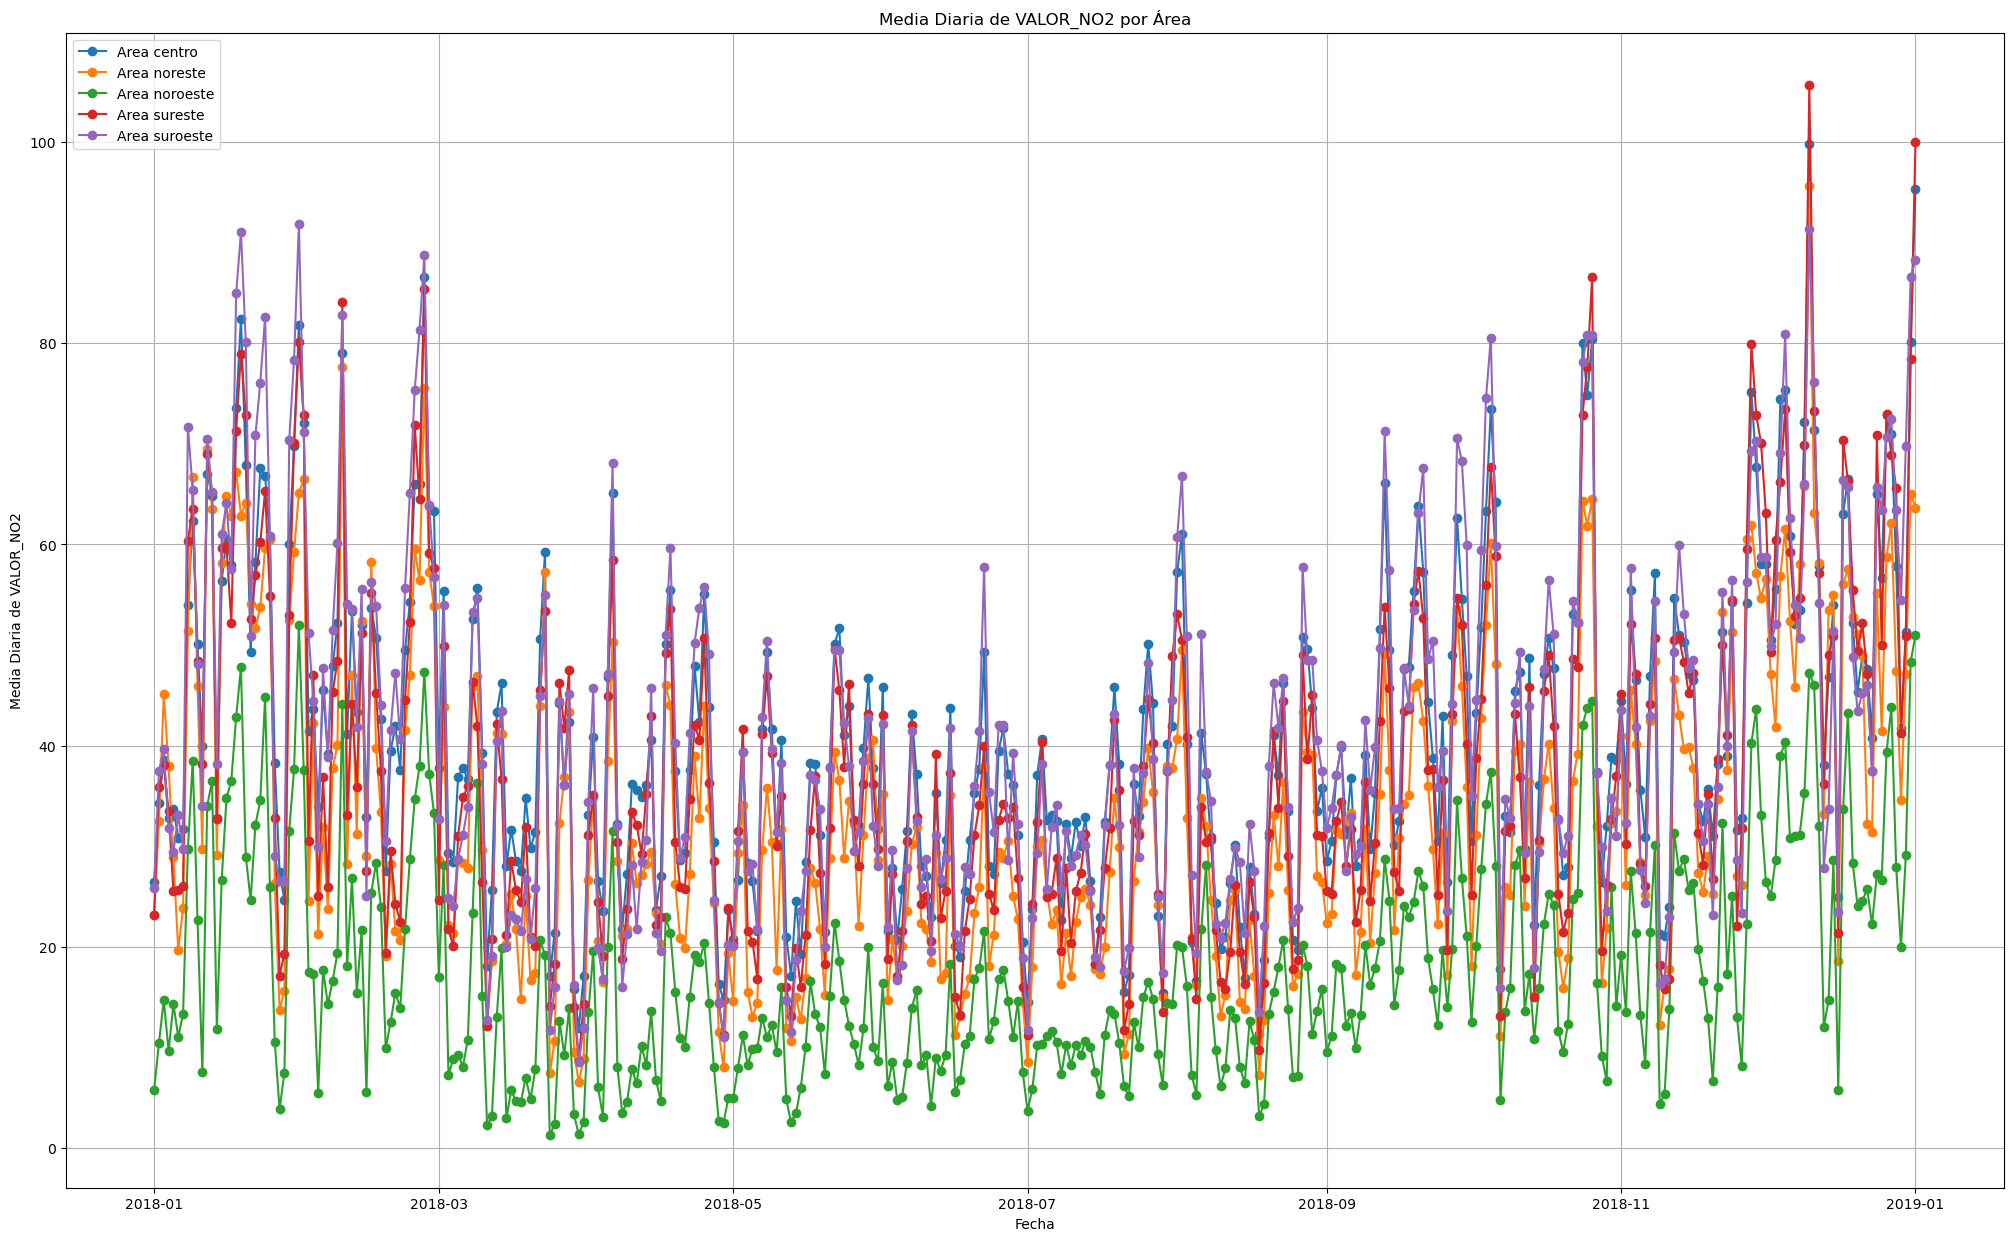

In [33]:
# Agrupar por AREA y por la fecha diaria, y calcular la media diaria de VALOR_NO2
df_mean = df_final.groupby(['AREA', df_final['FECHA'].dt.date])['VALOR_NO2'].mean().reset_index()

# Renombrar la columna de fecha para una mejor comprensión
df_mean.rename(columns={'FECHA': 'FECHA_DIARIA'}, inplace=True)

# Graficar los resultados
plt.figure(figsize=(25, 15))

for area in df_mean['AREA'].unique():
    area_data = df_mean[df_mean['AREA'] == area]
    plt.plot(area_data['FECHA_DIARIA'], area_data['VALOR_NO2'], marker='o', label=f'Area {area}')

plt.xlabel('Fecha')
plt.ylabel('Media Diaria de VALOR_NO2')
plt.title('Media Diaria de VALOR_NO2 por Área')
plt.legend()
plt.grid(True)
plt.show()

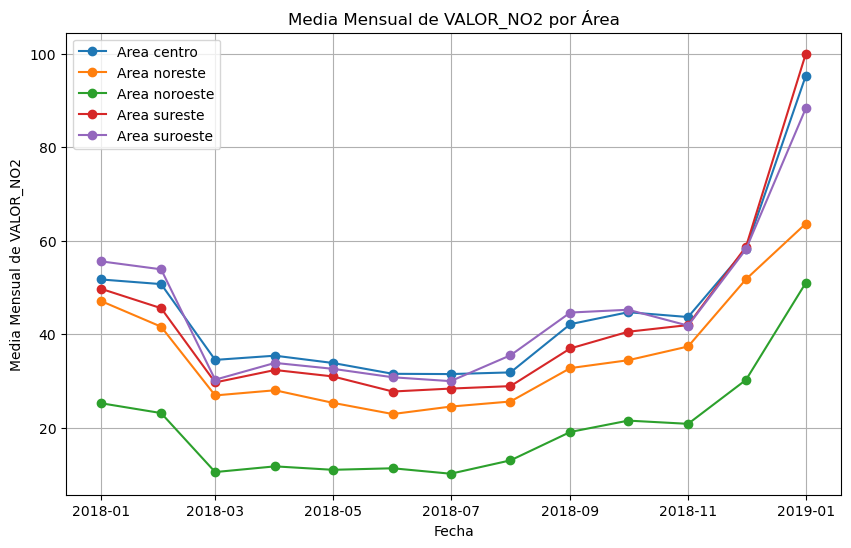

In [34]:
# Agrupar por AREA y por mes, y calcular la media mensual de VALOR_NO2
df_monthly_mean = df_final.copy()  # Crear una copia para mantener df sin cambios
df_monthly_mean['MES'] = df_monthly_mean['FECHA'].dt.to_period('M')
df_monthly_mean = df_monthly_mean.groupby(['AREA', 'MES'])['VALOR_NO2'].mean().reset_index()

# Convertir la columna FECHA_MENSUAL a datetime para la graficación
df_monthly_mean['MES'] = df_monthly_mean['MES'].dt.to_timestamp()

# Graficar los resultados
plt.figure(figsize=(10, 6))

for area in df_monthly_mean['AREA'].unique():
    area_data = df_monthly_mean[df_monthly_mean['AREA'] == area]
    plt.plot(area_data['MES'], area_data['VALOR_NO2'], marker='o', label=f'Area {area}')

plt.xlabel('Fecha')
plt.ylabel('Media Mensual de VALOR_NO2')
plt.title('Media Mensual de VALOR_NO2 por Área')
plt.legend()
plt.grid(True)
plt.show()


Como vemos, las estaciones del área noroeste de Madrid miden un menor nivel de contaminación respecto al resto.
También vemos como en Invierno los niveles de contaminación son mayores respecto al resto de estaciones

Vamos a estudiar la localización de las estaciones

In [35]:
df_estaciones

station      area                    name  \
0   28079004    centro          Pza. de España   
1   28079008    centro        Escuelas Aguirre   
2   28079011    centro     Avda. Ramón y Cajal   
3   28079016   noreste            Arturo Soria   
4   28079017  suroeste              Villaverde   
5   28079018  suroeste               Farolillo   
6   28079024  noroeste           Casa de Campo   
7   28079027   noreste          Barajas Pueblo   
8   28079035    centro         Pza. del Carmen   
9   28079036   sureste               Moratalaz   
10  28079038    centro          Cuatro Caminos   
11  28079039    centro        Barrio del Pilar   
12  28079040   sureste                Vallecas   
13  28079047    centro           Mendez Alvaro   
14  28079048    centro              Castellana   
15  28079049    centro       Parque del Retiro   
16  28079050    centro          Plaza Castilla   
17  28079054   sureste    Ensanche de Vallecas   
18  28079055   noreste           Urb. Embajada   
19  28079056  suroeste  Pza. Fernández Ladreda   
20  28079057   noreste             Sanchinarro   
21  28079058  noroeste                El Pardo   
22  28079059   noreste           Juan Carlos I   
23  28079060   noreste             Tres Olivos   

                                              address  altitude type  \
0                                     Plaza de España       635   UT   
1                      Entre C/ Alcalá y C/ O' Donell       670   UT   
2     Avda. Ramón y Cajal esq. C/ Príncipe de Vergara       708   UT   
3      C/ Arturo Soria esq. C/ Vizconde de los Asilos       693   UF   
4                                   C/. Juan Peñalver       604   UF   
5                         Calle Farolillo - C/Ervigio       630   UF   
6             Casa de Campo (Terminal del Teleférico)       642    S   
7                            C/. Júpiter 21 (Barajas)       621   UF   
8                  Plaza del Carmen esq. Tres Cruces.       659   UF   
9         Avd. Moratalaz esq. Camino de los Vinateros       685   UT   
10       Avda. Pablo Iglesias esq. C/ Marqués de Lema       698   UT   
11            Avd. Betanzos esq. C/ Monforte de Lemos       674   UT   
12           C/ Arroyo del Olivar esq. C/ Río Grande.       677   UF   
13   C/ Juan de Mariana / Pza. Amanecer Mendez Alvaro       599   UF   
14                          C/ Jose Gutierrez Abascal       676   UT   
15                     Paseo Venezuela- Casa de Vacas       662   UF   
16                             Plaza Castilla (Canal)       728   UT   
17                  Avda La Gavia / Avda. Las Suertes       627   UF   
18                                 C/ Riaño (Barajas)       618   UF   
19              Pza. Fernández Ladreda - Avda. Oporto       604   UT   
20            C/ Princesa de Eboli esq C/ Maria Tudor       700   UF   
21                                   Avda. La Guardia       615    S   
22  Parque Juan Carlos I (frente oficinas mantenim...       660    S   
23                                  Plaza Tres Olivos       715   UF   

    longitude   latitude  ESTACION  
0   -3.712247  40.423853         4  
1   -3.682319  40.421564         8  
2   -3.677356  40.451475        11  
3   -3.639233  40.440047        16  
4   -3.713322  40.347139        17  
5   -3.731853  40.394781        18  
6   -3.747347  40.419356        24  
7   -3.580031  40.476928        27  
8   -3.703172  40.419208        35  
9   -3.645306  40.407947        36  
10  -3.707128  40.445544        38  
11  -3.711542  40.478228        39  
12  -3.651522  40.388153        40  
13  -3.686825  40.398114        47  
14  -3.690367  40.439897        48  
15  -3.682583  40.414444        49  
16  -3.688769  40.465572        50  
17  -3.612117  40.372933        54  
18  -3.580747  40.462531        55  
19  -3.718728  40.384964        56  
20  -3.660503  40.494208        57  
21  -3.774611  40.518058        58  
22  -3.609072  40.465250        59  
23  -3.689761  40.500589        60

In [36]:
# Crear el mapa interactivo con Plotly
fig = px.scatter_mapbox(df_estaciones, lat="latitude", lon="longitude", hover_name="ESTACION", color="area",
                        zoom=3, height=500, color_discrete_sequence=px.colors.qualitative.Dark24)
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Mostrar el mapa interactivo
fig.show()

Como vemos, tiene sentido que las estaciones del área noroeste midan valores de NO$_2$ menores al resto de áreas pues las estaciones están localizadas en la casa de Campo y El Pardo, lugares llenos de naturaleza y alejados de focos de contaminación

Ahora vamos a hacer un pequeño estudio a través de boxplots para ver si dentro de cada agrupación de estaciones, varía mucho el nivel de NO$_2$ medido

In [37]:
df_monthly_mean

AREA        MES  VALOR_NO2
0     centro 2018-01-01  51.713186
1     centro 2018-02-01  50.726540
2     centro 2018-03-01  34.517577
3     centro 2018-04-01  35.416667
4     centro 2018-05-01  33.856446
..       ...        ...        ...
60  suroeste 2018-09-01  44.644289
61  suroeste 2018-10-01  45.241116
62  suroeste 2018-11-01  41.846083
63  suroeste 2018-12-01  58.183004
64  suroeste 2019-01-01  88.333333

[65 rows x 3 columns]

In [38]:
df_final

FECHA  VALOR_NO2 VALIDEZ     AREA  LONGITUD    LATITUD  \
0      2018-01-01 01:00:00       15.0       V   centro -3.712247  40.423853   
1      2018-01-01 02:00:00       35.0       V   centro -3.712247  40.423853   
2      2018-01-01 03:00:00       29.0       V   centro -3.712247  40.423853   
3      2018-01-01 04:00:00       16.0       V   centro -3.712247  40.423853   
4      2018-01-01 05:00:00       12.0       V   centro -3.712247  40.423853   
...                    ...        ...     ...      ...       ...        ...   
209995 2018-12-31 20:00:00       94.0       V  noreste -3.689761  40.500589   
209996 2018-12-31 21:00:00       98.0       V  noreste -3.689761  40.500589   
209997 2018-12-31 22:00:00       99.0       V  noreste -3.689761  40.500589   
209998 2018-12-31 23:00:00      109.0       V  noreste -3.689761  40.500589   
209999 2019-01-01 00:00:00       78.0       V  noreste -3.689761  40.500589   

              ESTACION  TEMPERATURA  
0       Pza. de España          7.3  
1       Pza. de España          7.4  
2       Pza. de España          6.8  
3       Pza. de España          7.1  
4       Pza. de España          5.3  
...                ...          ...  
209995     Tres Olivos          5.5  
209996     Tres Olivos          3.6  
209997     Tres Olivos          2.9  
209998     Tres Olivos          1.5  
209999     Tres Olivos          0.6  

[209081 rows x 8 columns]

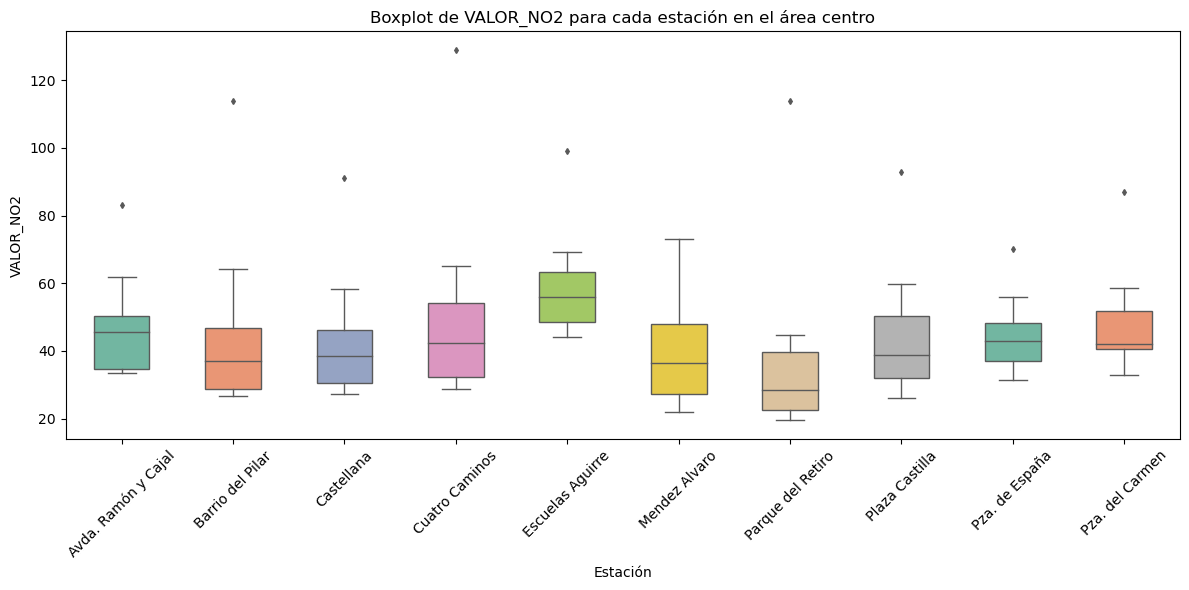

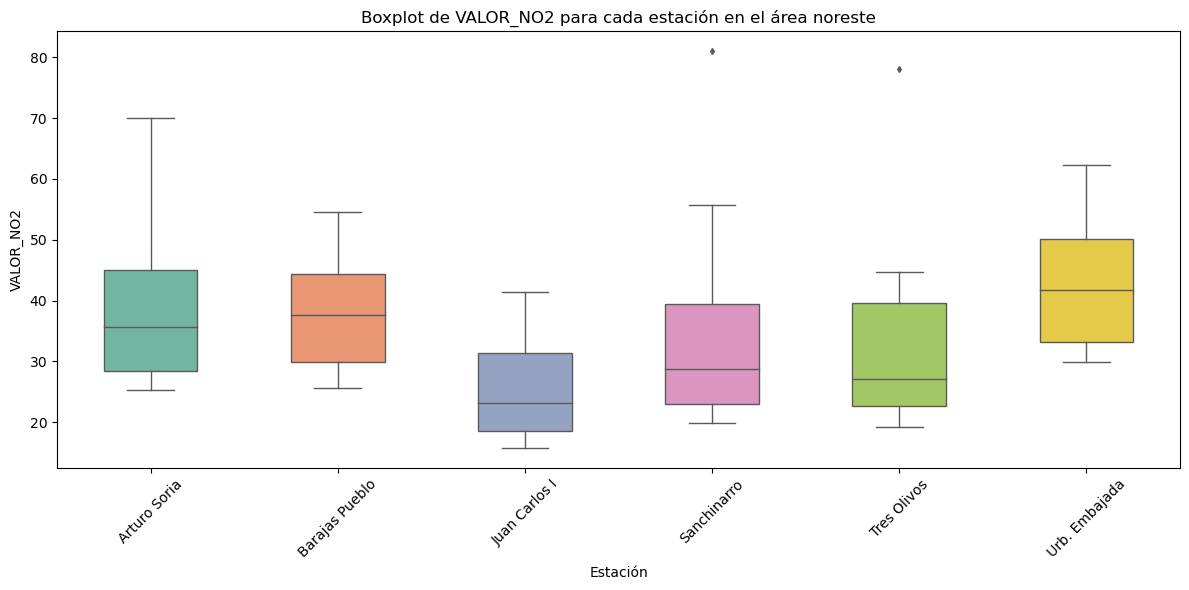

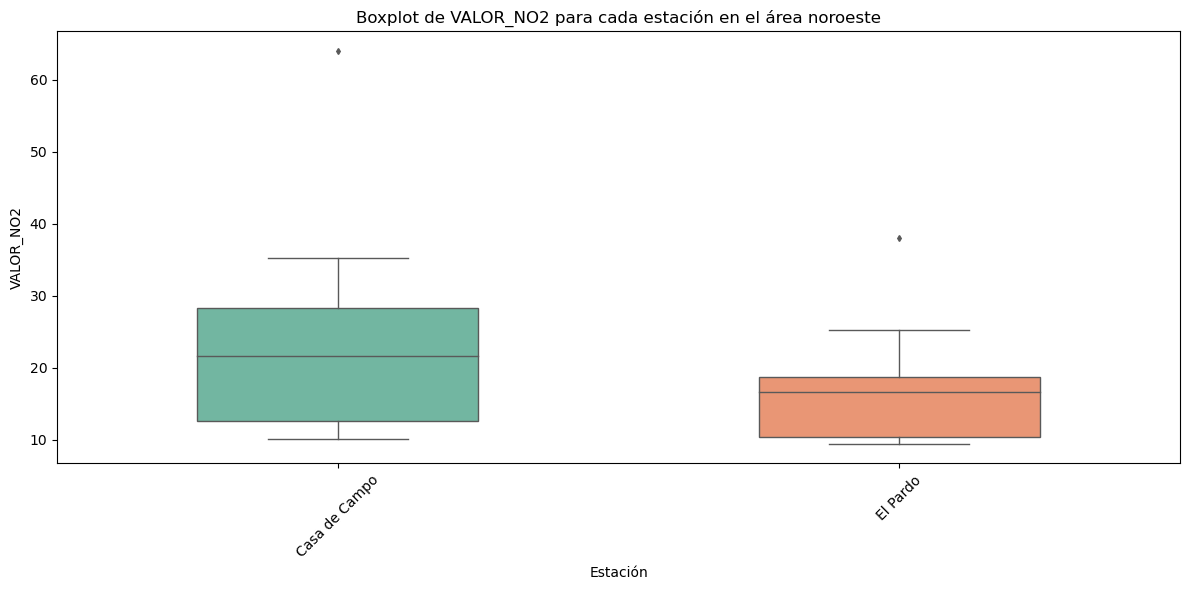

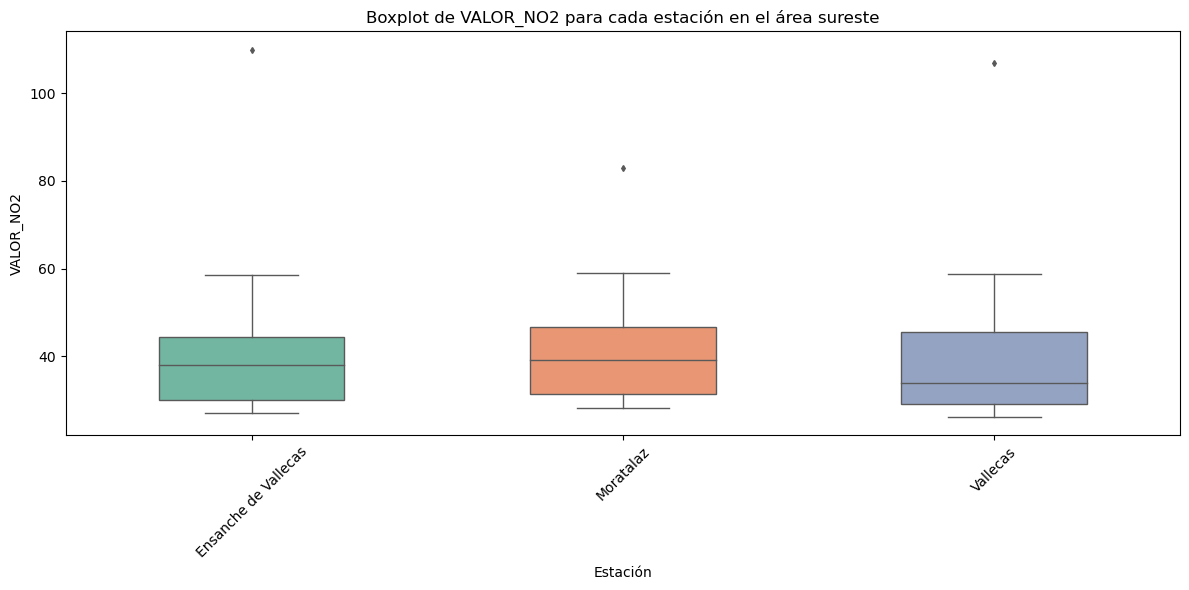

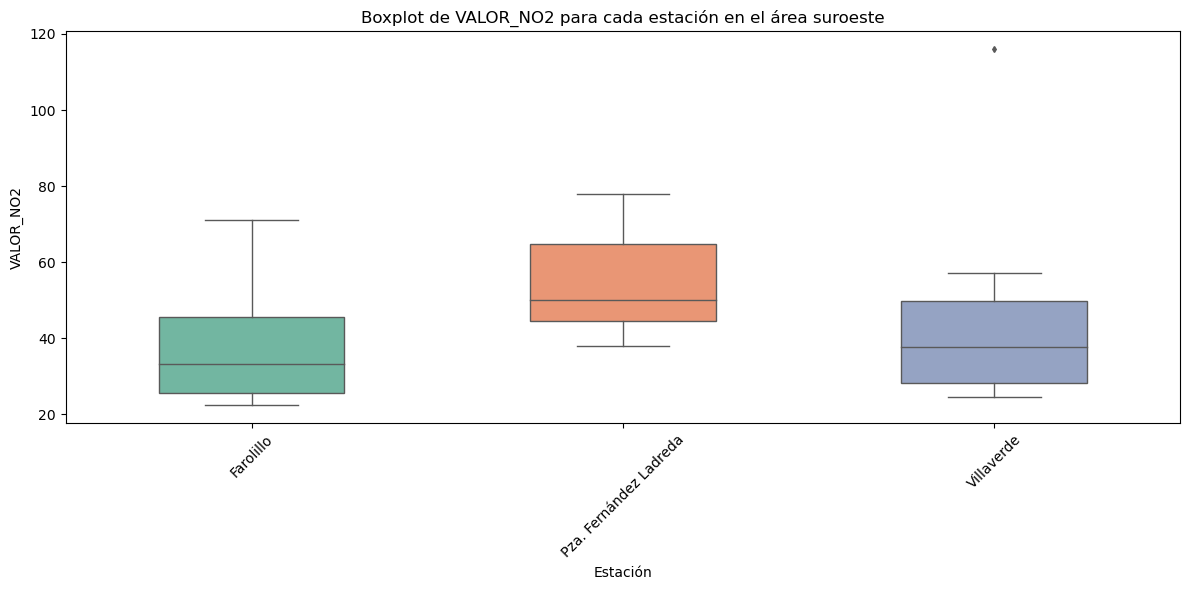

In [39]:
df_monthly_mean = df_final.copy()  # Crear una copia para mantener df sin cambios
df_monthly_mean['MES'] = df_monthly_mean['FECHA'].dt.to_period('M')
df_monthly_mean = df_monthly_mean.groupby(['AREA', 'MES', 'ESTACION'])['VALOR_NO2'].mean().reset_index()

# Convertir la columna FECHA_MENSUAL a datetime para la graficación
df_monthly_mean['MES'] = df_monthly_mean['MES'].dt.to_timestamp()
areas_unicas = df_monthly_mean['AREA'].unique()

# Iterar sobre cada área y crear una figura para cada una
for area in areas_unicas:
    # Filtrar el DataFrame por el área actual
    df_area = df_monthly_mean[df_monthly_mean['AREA'] == area]
    
    # Crear un boxplot para cada estación en el área actual
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='ESTACION', y='VALOR_NO2', data=df_area, width=0.5, linewidth=1, fliersize=3, palette='Set2')
    
    # Agregar título y etiquetas al gráfico
    plt.title(f'Boxplot de VALOR_NO2 para cada estación en el área {area}')
    plt.xlabel('Estación')
    plt.ylabel('VALOR_NO2')
    plt.xticks(rotation=45)
    
    # Mostrar el nombre del área encima del gráfico
    plt.figtext(0.5, 0.95, '', ha='center', va='center', fontsize=14)
    
    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

También veremos cuáles son las estaciones que más valores de NO$_2$ miden de media y su desviación estándar

In [40]:
# Calcular la media y la desviación estándar del valor de NO2 por estación y renombrar las columnas
df_estacion_stats = df_monthly_mean.groupby('ESTACION')['VALOR_NO2'].agg(MEDIA_NO2='mean', DESVIACION_ESTANDAR_NO2='std')

# Fusionar con el DataFrame original para obtener el área de cada estación
df_estacion_stats = df_estacion_stats.merge(df_monthly_mean[['ESTACION', 'AREA']], on='ESTACION')

# Ordenar por la media más alta
df_estacion_stats = df_estacion_stats.sort_values(by='MEDIA_NO2', ascending=False)
# Eliminar duplicados
df_estacion_stats = df_estacion_stats.drop_duplicates().reset_index(drop=True)
# Mostrar el DataFrame resultante
df_estacion_stats

ESTACION  MEDIA_NO2  DESVIACION_ESTANDAR_NO2      AREA
0         Escuelas Aguirre  58.243339                14.560359    centro
1   Pza. Fernández Ladreda  54.537805                12.166734  suroeste
2           Cuatro Caminos  48.324252                26.597870    centro
3          Pza. del Carmen  47.758193                13.684341    centro
4      Avda. Ramón y Cajal  45.894815                14.275272    centro
5           Pza. de España  45.038540                10.447284    centro
6         Barrio del Pilar  44.580437                23.907952    centro
7           Plaza Castilla  43.829680                17.793277    centro
8               Castellana  42.963839                17.116180    centro
9               Villaverde  42.848841                24.455977  suroeste
10    Ensanche de Vallecas  42.774798                22.143725   sureste
11           Urb. Embajada  42.723014                11.278786   noreste
12                Vallecas  42.262629                21.853554   sureste
13               Moratalaz  42.246153                15.511530   sureste
14            Arturo Soria  39.195731                13.136833   noreste
15           Mendez Alvaro  37.814918                14.556734    centro
16          Barajas Pueblo  37.609835                 9.711782   noreste
17               Farolillo  36.516915                14.483064  suroeste
18       Parque del Retiro  35.776936                24.987198    centro
19             Sanchinarro  35.269614                17.657691   noreste
20             Tres Olivos  32.124628                16.216918   noreste
21           Juan Carlos I  26.326310                 9.000907   noreste
22           Casa de Campo  23.103525                14.765470  noroeste
23                El Pardo  16.736362                 8.139002  noroeste

Por último vamos a comprobar si la temperatura y el valor de NO$_2$ están correlacionados, lo haremos con datos horarios ya que tenemos la desagregación suficiente

In [41]:
df_final

FECHA  VALOR_NO2 VALIDEZ     AREA  LONGITUD    LATITUD  \
0      2018-01-01 01:00:00       15.0       V   centro -3.712247  40.423853   
1      2018-01-01 02:00:00       35.0       V   centro -3.712247  40.423853   
2      2018-01-01 03:00:00       29.0       V   centro -3.712247  40.423853   
3      2018-01-01 04:00:00       16.0       V   centro -3.712247  40.423853   
4      2018-01-01 05:00:00       12.0       V   centro -3.712247  40.423853   
...                    ...        ...     ...      ...       ...        ...   
209995 2018-12-31 20:00:00       94.0       V  noreste -3.689761  40.500589   
209996 2018-12-31 21:00:00       98.0       V  noreste -3.689761  40.500589   
209997 2018-12-31 22:00:00       99.0       V  noreste -3.689761  40.500589   
209998 2018-12-31 23:00:00      109.0       V  noreste -3.689761  40.500589   
209999 2019-01-01 00:00:00       78.0       V  noreste -3.689761  40.500589   

              ESTACION  TEMPERATURA  
0       Pza. de España          7.3  
1       Pza. de España          7.4  
2       Pza. de España          6.8  
3       Pza. de España          7.1  
4       Pza. de España          5.3  
...                ...          ...  
209995     Tres Olivos          5.5  
209996     Tres Olivos          3.6  
209997     Tres Olivos          2.9  
209998     Tres Olivos          1.5  
209999     Tres Olivos          0.6  

[209081 rows x 8 columns]

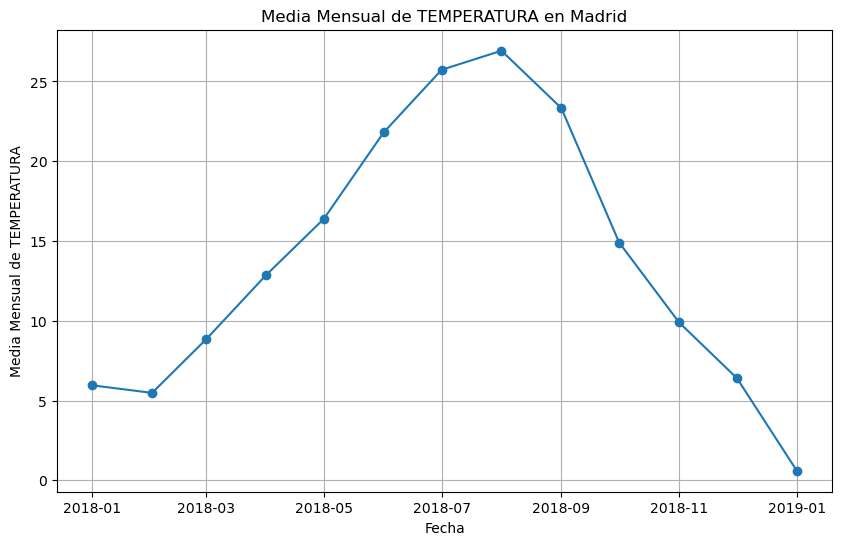

In [42]:
df_monthly_mean = df_final.copy()  # Crear una copia para mantener df sin cambios
df_monthly_mean['MES'] = df_monthly_mean['FECHA'].dt.to_period('M')
df_monthly_mean = df_monthly_mean.groupby(['MES'])['TEMPERATURA'].mean().reset_index()

# Renombrar la columna MES a FECHA_MENSUAL para una mejor comprensión
# df_monthly_mean.rename(columns={'MES': 'FECHA_MENSUAL'}, inplace=True)

# Convertir la columna FECHA_MENSUAL a datetime para la graficación
df_monthly_mean['MES'] = df_monthly_mean['MES'].dt.to_timestamp()

# Graficar los resultados
plt.figure(figsize=(10, 6))


plt.plot(df_monthly_mean['MES'], df_monthly_mean['TEMPERATURA'], marker='o')

plt.xlabel('Fecha')
plt.ylabel('Media Mensual de TEMPERATURA')
plt.title('Media Mensual de TEMPERATURA en Madrid')
plt.grid(True)
plt.show()

En un primer momento parece que podría haber cierta correlación entre temperatura y medición de NO$_2$ puesto que cuando la temperatura baja, el nivel de NO$_2$ baja y viceversa pero vamos a hacer un análisis de correlación:

In [43]:
# Calcular la correlación entre temperatura y valor de NO2 para cada estación
correlation_by_station = df_final.groupby('ESTACION')[['TEMPERATURA', 'VALOR_NO2']].corr().iloc[0::2,-1].reset_index()

# Renombrar las columnas
# Renombrar la columna 'VALOR_NO2'
correlation_by_station.rename(columns={'VALOR_NO2': 'CORRELACION_TEMPERATURA_NO2'}, inplace=True)

# Eliminar la columna 'level_1'
correlation_by_station.drop(columns='level_1', inplace=True)
correlation_by_station.sort_values(by='CORRELACION_TEMPERATURA_NO2')


ESTACION  CORRELACION_TEMPERATURA_NO2
21           Urb. Embajada                    -0.311182
11           Juan Carlos I                    -0.307064
23              Villaverde                    -0.305477
22                Vallecas                    -0.303599
14       Parque del Retiro                    -0.295897
12           Mendez Alvaro                    -0.293944
20             Tres Olivos                    -0.293152
19             Sanchinarro                    -0.292230
2           Barajas Pueblo                    -0.283547
10               Farolillo                    -0.272986
8     Ensanche de Vallecas                    -0.272345
0             Arturo Soria                    -0.271444
3         Barrio del Pilar                    -0.254683
13               Moratalaz                    -0.245080
4            Casa de Campo                    -0.239431
15          Plaza Castilla                    -0.239324
5               Castellana                    -0.221589
6           Cuatro Caminos                    -0.215701
18         Pza. del Carmen                    -0.171582
7                 El Pardo                    -0.161365
9         Escuelas Aguirre                    -0.160417
1      Avda. Ramón y Cajal                    -0.098805
16  Pza. Fernández Ladreda                    -0.097898
17          Pza. de España                    -0.013069

Cómo vemos, los valores de correlación son bajos (menores de 0.32 absoluto) y por lo tanto parece que un mayor o menor nivel de temperatura no es significativo en los niveles de NO$_2$

# 3. Plantea cómo harías un modelo de predicción a 3 días vista de los niveles de NO$_2$



### Variables a introducir: 

#### variable objetivo: 
- valores históricos del NO$_2$ 

#### Como variables explicativas:
- la temperatura (si pudiesemos acceder a datos externos, podríamos introducir más variables climáticas cómo radiación solar, viento, porcentaje de nubes, humedad relativa, etc.. de la API de wheaterbit https://www.meteomatics.com/en/weather-api/#about)
- la longitud y latitud del lugar donde vamos a predecir el nivel de NO$_2$
- añadir una columna a los datos que contenga la información de si un dia es festivo o no y que también sea un input al modelo

#### Profundidad de los datos:
- Ya que vamos a predecir a tres días vista, la agregación de los datos debe ser diaria y contener al menos 2 o 3 años

#### Técnicas de modelado a probar:
- ARIMA: ya que tenemos una serie temporal, habría que buscar la mejor combinación de parámetros para que el modelo captase la estacionalidad y tendencia (en este caso solo se usaría la variable objetivo)
- Random Forest, XGBoost o LightGBM: probar estos tres modelos con las variables mencionadas anteriormente obteniendo el mejor
- Redes neuronales: podríamos implementarlas pero creo que no es un problema tan complejo como para tener que utilizarlas